# Week_7 복습과제

# 1. Default of credit card clients Data Set으로 PCA 성능 평가하기

default of credit card client Dataset의 column별 설명

*   ID: ID of each client
*   LIMIT_BAL: Amount of given credit in NT dollars 
*   SEX: Gender (1=male, 2=female)
*   EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
*   MARRIAGE: Marital status (1=married, 2=single, 3=others)
*   AGE: Age in years
*   PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
*   PAY_2: Repayment status in August, 2005
*   PAY_3: Repayment status in July, 2005
*   PAY_4: Repayment status in June, 2005
*   PAY_5: Repayment status in May, 2005
*   PAY_6: Repayment status in April, 2005
*   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
*   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
*   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
*   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
*   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
*   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
*   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
*   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
*   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
*   default.payment.next.month: Default payment (1=yes, 0=no)

## 1. 데이터 불러오기
#### 판다스에서 제공하는 read_excel()을 이용해 필요한 데이터를 불러와주세요.
#### 제공된 엑셀 파일에서 Data 이름의 시트만을 이용합니다. header=1, sheet_name='Data' 로 변수를 지정하고 수행해주세요.

### #1. 데이터를 불러와 불필요한 칼럼인 ID를 지운 후 df란 이름으로 저장하시오. 

ID 칼럼이 잘 삭제되었는지 확인하기 위해 df의 3번째 열까지 출력하세요.

In [1]:
import pandas as pd
df=pd.read_excel('Week7_dataset.xls',header=1, sheet_name='Data')
df.drop(['ID'],axis=1,inplace=True)
df.iloc[:,0:3]

,LIMIT_BAL,SEX,EDUCATION
0,20000,2,2
1,120000,2,2
2,90000,2,2
3,50000,2,2
4,50000,1,2
...,...,...,...
29995,220000,1,3
29996,150000,1,3
29997,30000,1,2
29998,80000,1,3


### #2. 주어진 데이터의 행과 열의 개수를 출력하시오.

In [2]:
df.shape

(30000, 24)

## 2. 데이터 전처리하기

주어진 데이터에서 타깃값은 'default payment next month' 속성으로, '다음달 연체 여부'를 의미하며 '연체'일 경우 1, '정상납부'일 경우 0입니다.

#### #1. 판다스에서 제공하는 rename() 함수를 이용해 원본 데이터셋에서 PAY_0을 PAY_1으로, 타깃 칼럼의 이름을 'default'으로 변경하시오.

코드를 시행한 후 변경한 데이터셋의 3번째 열까지 출력해 제대로 바뀌었는지 확인하세요.

In [3]:
df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month':'default'}, inplace=True)

In [4]:
## 확인 코드 작성 ->3행까지 출력하겠습니다
df.head(3)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


#### #2. 타깃값인 'default' 칼럼을 y_target 변수로 별도로 지정하고 피처 데이터는 default 칼럼을 제외한 별도의 DataFrame (이름: X_features)으로 만드시오.

In [5]:
y_target=df['default']
X_features=df.drop('default', axis = 1)

## 3. 각 속성 간의 상관도를 구하기
해당 데이터셋은 23개의 속성 데이터가 있으나, 각 속성끼리 상관도가 매우 높습니다. 
#### DataFrame의 corr()을 이용해 각 속성 간의 상관도를 구한 뒤 이를 Seaborn의 heatmap으로 시각화하시오.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

figsize=(14,14)로 설정해주세요.
heatmap을 사용할 때 annot=True, fmt='.1g' 변수를 설정해주세요.

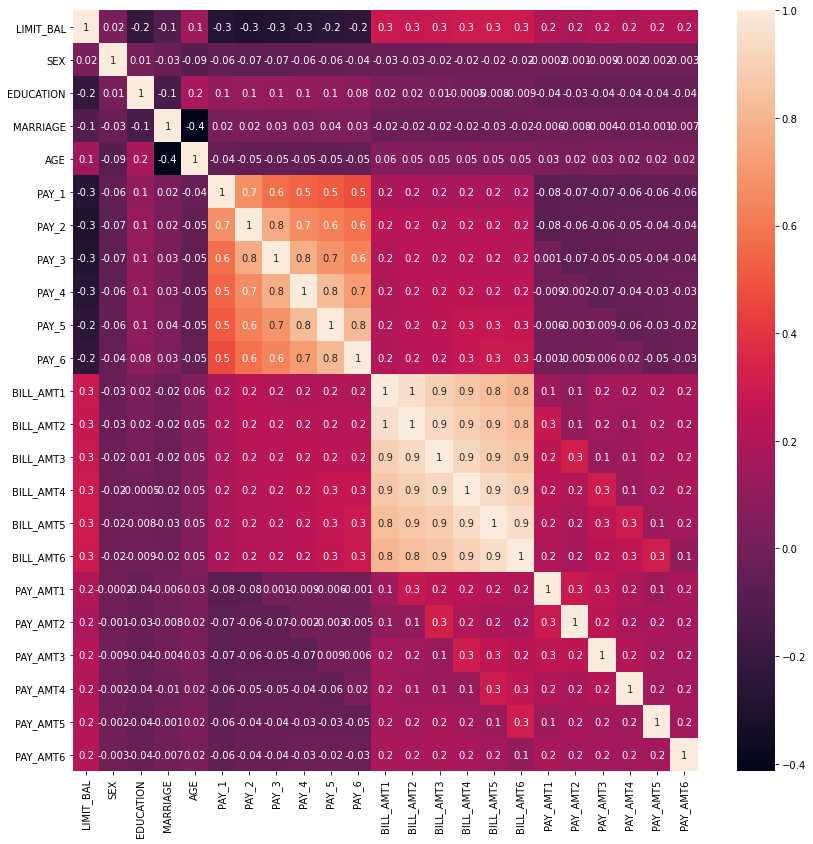

In [7]:
fig, ax = plt.subplots( figsize=(14,14))
# 히트맵을 그린다
sns.heatmap(X_features.corr(), 
            annot = True,   # 실제 값을 표시한다
            fmt='.1g' 
           )  
plt.show()

## 3. PCA

#### 위에서 구한 상관도를 통해 BILL_AMT1 ~ BILL_AMT6까지 6개의 속성들이 0.9 이상으로 상관도가 매우 높다는 것을 알 수 있습니다.
#### 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있습니다.
#### 따라서 BILL__AMT1 ~ BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 PCA 변환할 수 있다.

In [8]:
# 필요한 모듈 불러오기
from sklearn.decomposition import PCA

#### #1. BILL_AMT1 ~ BIL_AMT6까지 6개의 속성명을 생성해 cols_bill이란 이름으로 저장하시오.

###### 힌트: for문으로 'BILL_AMT'란 문자열과 str()함수, 그리고 range()함수를 이용해 칼럼명을 생성하세요.

In [9]:
cols_bill= [] 
for i in range(1,7):
    cols_bill.append('BILL_AMT'+str(i))   

In [10]:
## 제대로 cols_bill이 만들어졌는지 확인
print(cols_bill)

['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']


#### #2. StandardScaler와 cols_bill을 이용해 BILL_AMT1 ~ BILL_AMT6까지의 속성들을 scale하고 cols_scaled란 이름으로 저장하시오.



In [15]:
from sklearn.preprocessing import StandardScaler
cols_scaled= StandardScaler().fit_transform(df[cols_bill])

#### #3. 2개의 PCA 속성을 가진 PCA 객체를 이용해 cols_scaled 데이터의 component별 변동성을 출력하시오.

PCA의 explained_variance_ratio_ 변수를 출력하면 됩니다. 이때 이 계산을 위해 fit()을 호출해주세요.


In [18]:
pca = PCA(n_components=2) 
pca.fit(cols_scaled)

PCA(n_components=2)

In [20]:
### PCA component별 변동성 확인
pca.explained_variance_ratio_

array([0.90555253, 0.0509867 ])

위에서 얻은 변동성 결과로 6가지 속성들의 상관도를 평가해보세요. (어떤 축을 기준으로 판단했는지도 명시해주세요.)

답: 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있다. 특히 첫 번째 PCA 축으로 90%의 변동성을 수용할 정도로 6개 속성의 상관도가 매우 높다.

## 4. 원본 데이터셋과 PCA 변환 데이터셋의 분류 예측 결과 비교

이 문제에서는 X_features와 y_target을 이용합니다.

#### #1. 랜덤 포레스트를 이용해 원본 데이터셋을 교차 검증 세트로 분류 예측하시오.
#### 랜덤포레스트에서 n_estimators=300, random_state=156 이라는 변수를 설정해주세요.
#### 교차검증시 scoring='accuracy', cv=3 으로 변수를 설정해주세요.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(model , X_features, y_target , scoring='accuracy', cv=3 )

#### 개별 Fold세트별 정확도와 평균 정확도를 출력하시오. (평균 정확도의 경우 소수점 넷째자리까지만)

In [23]:
print('교차 검증별 정확도:',scores)
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.8083 0.8196 0.8232]
평균 검증 정확도: 0.817


#### #2. 6개의 컴포넌트를 가진 변환을 수행한 후 같은 조건으로 분류 예측하시오.


1.   먼저 StandardScaler를 이용해 원본 데이터를 scale하세요.
2.   n_components=6인 PCA 변환을 수행한 후, 교차 검증 세트로 분류 예측하세요.



In [28]:
X_features_scaled= StandardScaler().fit_transform(X_features)
pca = PCA(n_components=6) 
X_features_scaled_pca=pca.fit_transform(X_features_scaled)

In [29]:
scores = cross_val_score(model,X_features_scaled_pca, y_target , scoring='accuracy', cv=3 )

#### 개별 Fold세트별 정확도와 평균 정확도를 출력하시오. (평균 정확도의 경우 소수점 넷째자리까지만)

In [30]:
print('교차 검증별 정확도:',scores)
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.7906 0.7973 0.804 ]
평균 검증 정확도: 0.7973


PCA의 예측성능이 저하되었는가?
이를 기준으로 PCA의 압축 능력을 판단하세요. (좋음, 보통, 나쁨)

답: 네. 보통

# 2. (연습문제 10) MNIST 데이터셋을 LDA 알고리즘으로 분류하고 평가하기

#### 1. 사이킷런의 fetch_openml()을 이용해 mnist 데이터셋을 불러오세요.
#### mnist의 target값의 경우 astype()을 이용해 uint8 데이터타입으로 변환해주세요.

In [39]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') 

In [40]:
mnist.target=mnist.target.astype('uint8')
mnist.target.dtype

dtype('uint8')

#### 2. mnist 데이터셋의 data 칼럼을 X에, target 칼럼을 y에 저장하세요.

In [41]:
X=mnist.data
y=mnist.target

다음은 산점도를 그릴 때 보기 좋도록 하는 함수입니다. 한번 꼭 돌려주세요!

In [43]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl


def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    X_normalized = MinMaxScaler().fit_transform(X)
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

#### 3. 2개의 component를 가진 LDA로 mnist 데이터셋을 변환시키고, 이 변환을 수행하는데 걸린 시간과 산점도를 출력하세요. (figsize=(12,12))

실행 소요시간 (단위 초) : 15.465640783309937


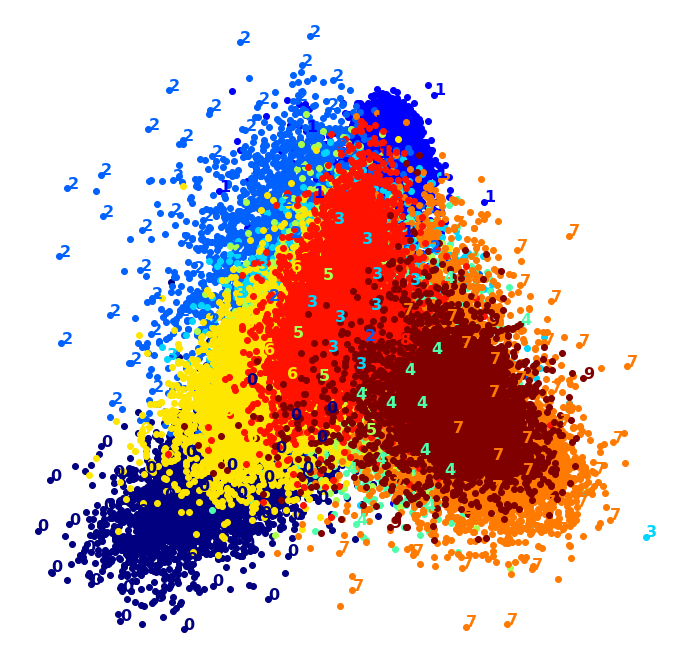

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time
start_time = time.time()

lda = LinearDiscriminantAnalysis(n_components=2)
X_transform = lda.fit_transform(X, y)

end_time = time.time()

print("실행 소요시간 (단위 초) : " + str(end_time -start_time))
plot_digits(X_transform, y, figsize=(12,12))
plt.show()

LDA의 성능을 평가하시오. (좋음/보통/나쁨 + 이유)

답: 나쁨. 클래스가 멀지 않고 겹쳐있다.

#### 4. 분산의 95%를 보존하도록 먼저 PCA를 적용한 뒤 LDA를 시행하는 파이프라인을 만들고, 이 파이프라인의 수행시간과 산점도를 출력하세요.

실행 소요시간 (단위 초) : 8.781515121459961


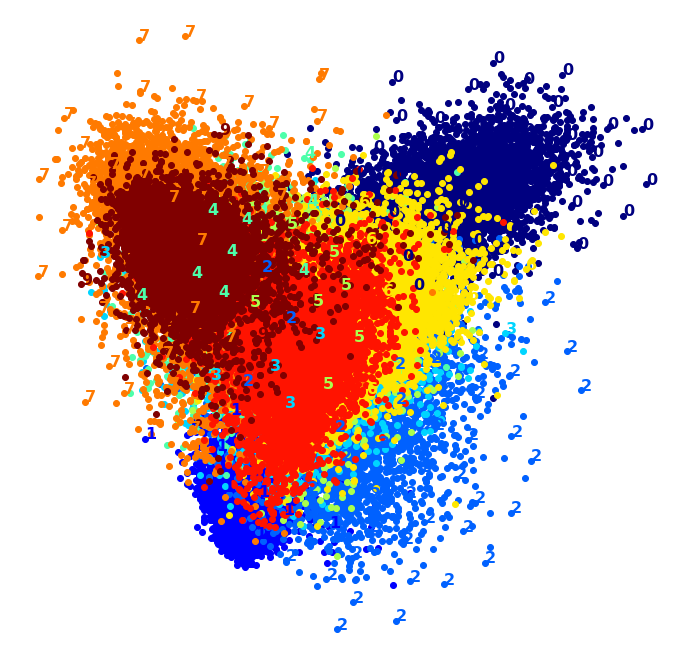

In [52]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('pca',PCA(0.95)),
    ('lda',LinearDiscriminantAnalysis(n_components=2))
    ])

start_time = time.time()

X_transform=pipeline.fit_transform(X,y)

end_time = time.time()
print("실행 소요시간 (단위 초) : " + str(end_time -start_time))
plot_digits(X_transform, y, figsize=(12,12))
plt.show()

LDA 알고리즘만을 수행했을 때보다 성능이 더 좋아졌는가? 수행시간과 산점도에 대해 각각 평가하세요. (더 좋아짐/그대로/더 나빠짐)

답: 수행시간은 감소했고, 성능은 조금 좋아졌다. 